In [9]:
import numpy as np
from SimPEG import Mesh
from scipy.constants import mu_0, epsilon_0
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
t = np.linspace(0, 0.15, 200)*1e-3
z = -np.linspace(0, 250, 200)
c = np.sqrt(1./(mu_0*epsilon_0))
z0 = -c*3.3e-4*1e-3
t0 = 0.03*1e-3
sigma = 0.01

In [47]:
# def foo0(t, z, mu, sigma, e0=1e-3):
#     bunja = np.sqrt(mu*sigma)*z*np.exp(-mu*sigma*z**2/(4.*t))
#     bunmo = 2.*np.pi**0.5*t**1.5
#     return -bunja/bunmo * e0

In [48]:
def ex(t, z, mu, sigma, e0=1e-3):
    theta = np.sqrt(mu*sigma/(4*t))
    bunja = z*theta*np.exp(-theta**2*z**2)
    bunmo = np.pi**0.5*t
    return -bunja/bunmo * e0

In [49]:
def hy(t, z, mu, sigma, e0=1e-3):
    theta = np.sqrt(mu*sigma/(4*t))
    bunja = 2*theta*np.exp(-theta**2*z**2)
    bunmo = np.pi**0.5*mu
    return -bunja/bunmo * e0

In [50]:
dz =-diff(z)[0]

In [73]:
hy0 = hy(t0, z+dz, mu_0, sigma, e0=1.)
hy1 = hy(t0, z-dz, mu_0, sigma, e0=1.)
ex_num = - (hy0-hy1) / (2*dz) / sigma

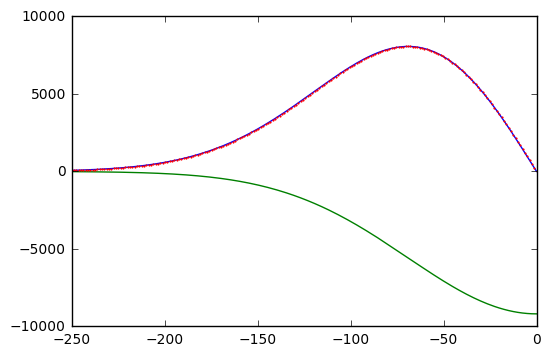

In [74]:
# foo0(t0, z, mu_0, sigma, e0=1.) - foo1(t0, z, mu_0, sigma, e0=1.)
plt.plot(z, ex(t0, z, mu_0, sigma, e0=1.))
plt.plot(z, hy(t0, z, mu_0, sigma, e0=1.))
plt.plot(z, ex_num, '.', ms=2)

/Users/sgkang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/Users/sgkang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


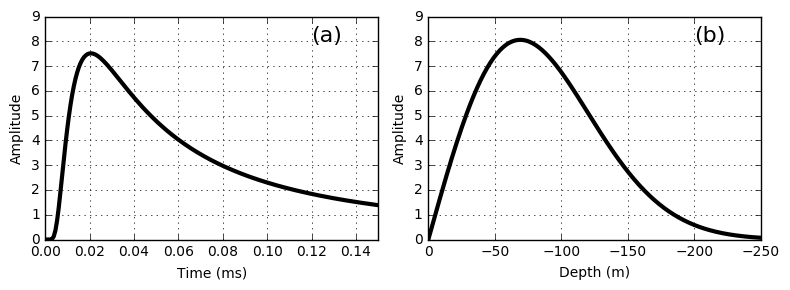

In [43]:
fig = plt.figure(figsize = (8, 3))
out = ex(t0, z, mu_0, sigma)
ax1 = plt.subplot(122)
ax2 = plt.subplot(121)
ax1.plot(z, out,'k', lw=3)
ax1.set_xlim(z.max(), z.min())
ax1.set_ylim(0, 9)
ax1.set_xlabel("Depth (m)")
ax1.set_ylabel("Amplitude")
ax1.grid(True)
ax1.text(-200, 8, "(b)", fontsize=16)

out = ex(t, z0, mu_0, sigma)
ax2.plot(t*1e3, out,'k', lw=3)
ax2.set_xlim(t.min()*1e3, t.max()*1e3)
ax2.set_ylim(0, 9)
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("Amplitude")
ax2.grid(True)
ax2.text(0.12, 8, "(a)", fontsize=16)
plt.tight_layout()
# fig.savefig("/Users/sgkang/Projects/em/content/maxwell1_fundamentals/maxwells_equations/maxwells_equations_in_homogeneous_media/time_domain/plane_wave_sources/images/Ward1988Fig1_2.png", dpi=200)

/Users/sgkang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/Users/sgkang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


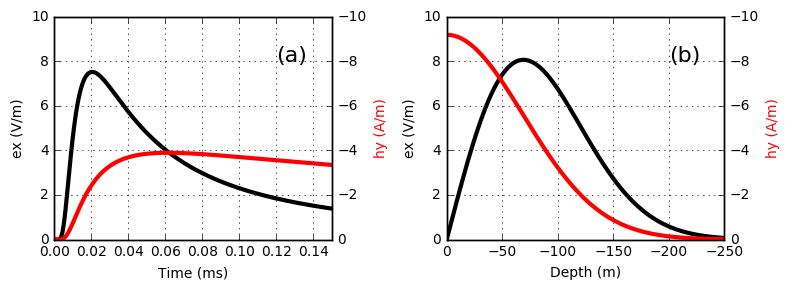

In [68]:
fig = plt.figure(figsize = (8, 3))
ex_num = ex(t0, z, mu_0, sigma)
hy_num = hy(t0, z, mu_0, sigma)

ax1 = plt.subplot(122)
ax2 = plt.subplot(121)
ax1_1 = ax1.twinx()
ax2_1 = ax2.twinx()
ax1.plot(z, ex_num,'k', lw=3)
ax1_1.plot(z, hy_num,'r', lw=3)
ax1.set_xlim(z.max(), z.min())
ax1.set_ylim(0, 10)
ax1_1.set_ylim(0, -10)
ax1.set_xlabel("Depth (m)")
ax1.set_ylabel("ex (V/m)")
ax1_1.set_ylabel("hy (A/m)", color="r")
ax1.grid(True)
ax1.text(-200, 8, "(b)", fontsize=16)

ex_num = ex(t, z0, mu_0, sigma)
hy_num = hy(t, z0, mu_0, sigma)
ax2.plot(t*1e3, ex_num,'k', lw=3)
ax2_1.plot(t*1e3, hy_num,'r', lw=3)
ax2.set_xlim(t.min()*1e3, t.max()*1e3)
ax2.set_ylim(0, 10)
ax2_1.set_ylim(0, -10)
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("ex (V/m)")
ax2_1.set_ylabel("hy (A/m)", color="r")
ax2.grid(True)
ax2.text(0.12, 8, "(a)", fontsize=16)
plt.tight_layout()
fig.savefig("/Users/sgkang/Projects/em/content/maxwell1_fundamentals/maxwells_equations/maxwells_equations_in_homogeneous_media/time_domain/plane_wave_sources/images/Ward1988Fig1_2withhy.png", dpi=200)